In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [6]:
from datetime import datetime, timedelta

def decimal_year_to_datetime(decimal_year):
  """Converts a decimal year format to datetime object.

  Args:
      decimal_year: A float representing the year with a decimal part for day fraction.

  Returns:
      A datetime object representing the date and time.
  """
  year = int(decimal_year)
  day_fraction = decimal_year - year

  # Calculate days since year start
  days = int(day_fraction * 365)

  # Calculate hours from remaining fraction
  hours = int((day_fraction - days/365) * 24)

  # Calculate minutes from remaining fraction
  minutes = int((day_fraction - days/365 - hours/24) * 60)

  # Create datetime object for the year
  base_date = datetime(year, 1, 1)

  # Add days, hours, and minutes as timedelta
  return base_date + timedelta(days=days, hours=hours, minutes=minutes)

# Example usage
date_time = decimal_year_to_datetime(2024.4398907)
print(date_time)  # Output: 2024-06-9


2024-06-09 00:00:00


## ENSO (from JPL)

In [ ]:
rawjson  = requests.get("https://sealevel.jpl.nasa.gov/api/v1/chartable_values?category=252&per_page=-1&order=x+asc").text

In [11]:
data = json.loads(rawjson)['items']


In [19]:
enso = pd.DataFrame(data)

In [27]:
enso['date'] = enso['x'].astype(float).apply(decimal_year_to_datetime)
enso['enso'] = enso['y'].astype(float)
enso

,id,x,y,error_margin,display_on_rollover,y_margin_max,y_margin_min,units,category_titles,date,enso
0,144930,1992.7595628,0.545185,None,1,None,None,None,[el_nino_chart],1992-10-04,0.545185
1,144933,1992.7786885,0.493175,None,1,None,None,None,[el_nino_chart],1992-10-11,0.493175
2,144936,1992.7978142,0.44231,None,1,None,None,None,[el_nino_chart],1992-10-18,0.442310
3,144939,1992.8169399,0.378216,None,1,None,None,None,[el_nino_chart],1992-10-25,0.378216
4,144942,1992.8360656,0.407201,None,1,None,None,None,[el_nino_chart],1992-11-01,0.407201
...,...,...,...,...,...,...,...,...,...,...,...
1640,149850,2024.363388,0.208336,None,1,None,None,None,[el_nino_chart],2024-05-12,0.208336
1641,149853,2024.3825137,0.302815,None,1,None,None,None,[el_nino_chart],2024-05-19,0.302815
1642,149856,2024.4016393,0.325497,None,1,None,None,None,[el_nino_chart],2024-05-26,0.325497
1643,149859,2024.420765,0.210735,None,1,None,None,None,[el_nino_chart],2024-06-02,0.210735


<Axes: xlabel='date'>

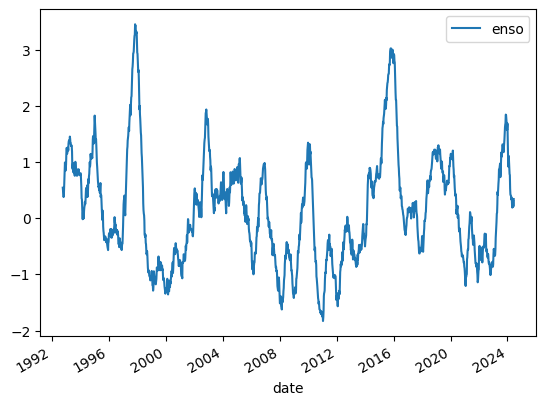

In [ ]:
enso[['date','enso']].plot(x='date', y='enso')

In [32]:
enso[['date','enso']].to_csv('enso.csv.gz', index=False)

## Indian Ocean Dipole

In [2]:
rawiod = requests.get("https://sealevel.jpl.nasa.gov/api/v1/chartable_values?category=254&per_page=-1&order=x+asc").text

In [3]:
dataiod = json.loads(rawiod)['items']

In [4]:
iod = pd.DataFrame(dataiod)
iod

,id,x,y,error_margin,display_on_rollover,y_margin_max,y_margin_min,units,category_titles
0,144932,1992.7595628,-0.844694,None,1,None,None,None,[indian_ocean_dipole]
1,144935,1992.7786885,-1.089122,None,1,None,None,None,[indian_ocean_dipole]
2,144938,1992.7978142,-1.279551,None,1,None,None,None,[indian_ocean_dipole]
3,144941,1992.8169399,-1.482551,None,1,None,None,None,[indian_ocean_dipole]
4,144944,1992.8360656,-1.147044,None,1,None,None,None,[indian_ocean_dipole]
...,...,...,...,...,...,...,...,...,...
1640,149852,2024.363388,1.262469,None,1,None,None,None,[indian_ocean_dipole]
1641,149855,2024.3825137,0.947368,None,1,None,None,None,[indian_ocean_dipole]
1642,149858,2024.4016393,0.633452,None,1,None,None,None,[indian_ocean_dipole]
1643,149861,2024.420765,0.47848,None,1,None,None,None,[indian_ocean_dipole]


In [7]:
iod['date'] = iod['x'].astype(float).apply(decimal_year_to_datetime)
iod['iod'] = iod['y'].astype(float)

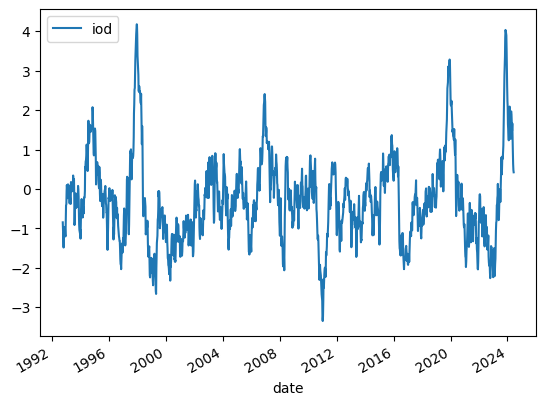

In [8]:
iod[['date','iod']].plot(x='date', y='iod');

In [9]:
iod[['date','iod']].to_csv('iod.csv.gz', index=False)

## PDO

In [10]:
rawpdo = requests.get("https://sealevel.jpl.nasa.gov/api/v1/chartable_values?category=253&per_page=-1&order=x+asc").text
datapdo = json.loads(rawpdo)['items']

In [11]:
pdo = pd.DataFrame(datapdo)
pdo

,id,x,y,error_margin,display_on_rollover,y_margin_max,y_margin_min,units,category_titles
0,144931,1992.7595628,1.410926,None,1,None,None,None,[pacific_decadal_oscillation]
1,144934,1992.7786885,1.623371,None,1,None,None,None,[pacific_decadal_oscillation]
2,144937,1992.7978142,1.299069,None,1,None,None,None,[pacific_decadal_oscillation]
3,144940,1992.8169399,1.086013,None,1,None,None,None,[pacific_decadal_oscillation]
4,144943,1992.8360656,1.206177,None,1,None,None,None,[pacific_decadal_oscillation]
...,...,...,...,...,...,...,...,...,...
1640,149851,2024.363388,0.655849,None,1,None,None,None,[pacific_decadal_oscillation]
1641,149854,2024.3825137,1.000201,None,1,None,None,None,[pacific_decadal_oscillation]
1642,149857,2024.4016393,0.693749,None,1,None,None,None,[pacific_decadal_oscillation]
1643,149860,2024.420765,0.47636,None,1,None,None,None,[pacific_decadal_oscillation]


In [12]:
pdo['date'] = pdo['x'].astype(float).apply(decimal_year_to_datetime)
pdo['pdo'] = pdo['y'].astype(float)

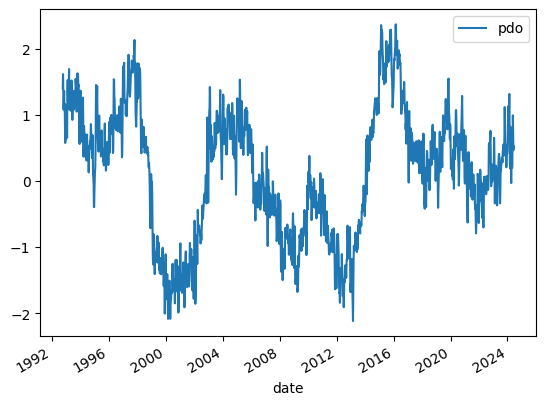

In [13]:
pdo[['date','pdo']].plot(x='date', y='pdo');

In [15]:
pdo[['date','pdo']].to_csv('pdo.csv.gz', index=False)

In [2]:
dengue = pd.read_csv('dengue_30jun.csv')
dengue

,year,epiweek,casos,geocode,regional,regional_geocode,macroregional,macroregional_geocode,uf
0,2010,201001,0,4208450,Nordeste,42011,Planalto Norte e Nordeste,4211,SC
1,2010,201001,0,4216206,Nordeste,42011,Planalto Norte e Nordeste,4211,SC
2,2010,201001,0,4218509,Meio Oeste,42008,Meio Oeste e Serra Catarinense,4212,SC
3,2010,201001,0,4216404,Extremo Sul Catarinense,42014,Sul,4210,SC
4,2010,201001,0,4201307,Nordeste,42011,Planalto Norte e Nordeste,4211,SC
...,...,...,...,...,...,...,...,...,...
4187428,2024,202423,0,2902401,Itabuna,29012,Sul,2910,BA
4187429,2024,202423,0,2903409,Porto Seguro,29018,Extremo Sul,2916,BA
4187430,2024,202423,0,2904753,Ibotirama,29008,Oeste,2912,BA
4187431,2024,202423,0,2906907,Teixeira de Freitas,29026,Extremo Sul,2916,BA


In [3]:
from epiweeks import Week, Year

In [4]:
def get_start_date(ew):
    ano = int(str(ew)[:-2])
    se = int(str(ew)[-2:])
    w = Week(ano,se)
    return w.startdate()

In [5]:
dengue['date'] = dengue['epiweek'].apply(get_start_date)

In [6]:
dengue

,year,epiweek,casos,geocode,regional,regional_geocode,macroregional,macroregional_geocode,uf,date
0,2010,201001,0,4208450,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03
1,2010,201001,0,4216206,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03
2,2010,201001,0,4218509,Meio Oeste,42008,Meio Oeste e Serra Catarinense,4212,SC,2010-01-03
3,2010,201001,0,4216404,Extremo Sul Catarinense,42014,Sul,4210,SC,2010-01-03
4,2010,201001,0,4201307,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03
...,...,...,...,...,...,...,...,...,...,...
4187428,2024,202423,0,2902401,Itabuna,29012,Sul,2910,BA,2024-06-02
4187429,2024,202423,0,2903409,Porto Seguro,29018,Extremo Sul,2916,BA,2024-06-02
4187430,2024,202423,0,2904753,Ibotirama,29008,Oeste,2912,BA,2024-06-02
4187431,2024,202423,0,2906907,Teixeira de Freitas,29026,Extremo Sul,2916,BA,2024-06-02


In [7]:
dengue['train_1'] = dengue.epiweek<202241
dengue

,year,epiweek,casos,geocode,regional,regional_geocode,macroregional,macroregional_geocode,uf,date,train_1
0,2010,201001,0,4208450,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True
1,2010,201001,0,4216206,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True
2,2010,201001,0,4218509,Meio Oeste,42008,Meio Oeste e Serra Catarinense,4212,SC,2010-01-03,True
3,2010,201001,0,4216404,Extremo Sul Catarinense,42014,Sul,4210,SC,2010-01-03,True
4,2010,201001,0,4201307,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True
...,...,...,...,...,...,...,...,...,...,...,...
4187428,2024,202423,0,2902401,Itabuna,29012,Sul,2910,BA,2024-06-02,False
4187429,2024,202423,0,2903409,Porto Seguro,29018,Extremo Sul,2916,BA,2024-06-02,False
4187430,2024,202423,0,2904753,Ibotirama,29008,Oeste,2912,BA,2024-06-02,False
4187431,2024,202423,0,2906907,Teixeira de Freitas,29026,Extremo Sul,2916,BA,2024-06-02,False


In [8]:
dengue['train_2'] = dengue.epiweek<202341
dengue

,year,epiweek,casos,geocode,regional,regional_geocode,macroregional,macroregional_geocode,uf,date,train_1,train_2
0,2010,201001,0,4208450,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True,True
1,2010,201001,0,4216206,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True,True
2,2010,201001,0,4218509,Meio Oeste,42008,Meio Oeste e Serra Catarinense,4212,SC,2010-01-03,True,True
3,2010,201001,0,4216404,Extremo Sul Catarinense,42014,Sul,4210,SC,2010-01-03,True,True
4,2010,201001,0,4201307,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4187428,2024,202423,0,2902401,Itabuna,29012,Sul,2910,BA,2024-06-02,False,False
4187429,2024,202423,0,2903409,Porto Seguro,29018,Extremo Sul,2916,BA,2024-06-02,False,False
4187430,2024,202423,0,2904753,Ibotirama,29008,Oeste,2912,BA,2024-06-02,False,False
4187431,2024,202423,0,2906907,Teixeira de Freitas,29026,Extremo Sul,2916,BA,2024-06-02,False,False


In [9]:
dengue['target_1'] = (dengue.epiweek>=202241)&(dengue.epiweek<202340)
dengue['target_2'] = dengue.epiweek>=202341
dengue

,year,epiweek,casos,geocode,regional,regional_geocode,macroregional,macroregional_geocode,uf,date,train_1,train_2,target_1,target_2
0,2010,201001,0,4208450,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True,True,False,False
1,2010,201001,0,4216206,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True,True,False,False
2,2010,201001,0,4218509,Meio Oeste,42008,Meio Oeste e Serra Catarinense,4212,SC,2010-01-03,True,True,False,False
3,2010,201001,0,4216404,Extremo Sul Catarinense,42014,Sul,4210,SC,2010-01-03,True,True,False,False
4,2010,201001,0,4201307,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187428,2024,202423,0,2902401,Itabuna,29012,Sul,2910,BA,2024-06-02,False,False,False,True
4187429,2024,202423,0,2903409,Porto Seguro,29018,Extremo Sul,2916,BA,2024-06-02,False,False,False,True
4187430,2024,202423,0,2904753,Ibotirama,29008,Oeste,2912,BA,2024-06-02,False,False,False,True
4187431,2024,202423,0,2906907,Teixeira de Freitas,29026,Extremo Sul,2916,BA,2024-06-02,False,False,False,True


In [10]:
dengue.columns

Index(['year', 'epiweek', 'casos', 'geocode', 'regional', 'regional_geocode',
       'macroregional', 'macroregional_geocode', 'uf', 'date', 'train_1',
       'train_2', 'target_1', 'target_2'],
      dtype='object')

In [11]:
dengue[['date', 'year', 'epiweek', 'casos', 'geocode', 'regional', 'regional_geocode',
       'macroregional', 'macroregional_geocode', 'uf',  'train_1',
       'train_2', 'target_1', 'target_2']].to_csv('dengue.csv.gz', index=False)

In [12]:
dengue

,year,epiweek,casos,geocode,regional,regional_geocode,macroregional,macroregional_geocode,uf,date,train_1,train_2,target_1,target_2
0,2010,201001,0,4208450,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True,True,False,False
1,2010,201001,0,4216206,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True,True,False,False
2,2010,201001,0,4218509,Meio Oeste,42008,Meio Oeste e Serra Catarinense,4212,SC,2010-01-03,True,True,False,False
3,2010,201001,0,4216404,Extremo Sul Catarinense,42014,Sul,4210,SC,2010-01-03,True,True,False,False
4,2010,201001,0,4201307,Nordeste,42011,Planalto Norte e Nordeste,4211,SC,2010-01-03,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187428,2024,202423,0,2902401,Itabuna,29012,Sul,2910,BA,2024-06-02,False,False,False,True
4187429,2024,202423,0,2903409,Porto Seguro,29018,Extremo Sul,2916,BA,2024-06-02,False,False,False,True
4187430,2024,202423,0,2904753,Ibotirama,29008,Oeste,2912,BA,2024-06-02,False,False,False,True
4187431,2024,202423,0,2906907,Teixeira de Freitas,29026,Extremo Sul,2916,BA,2024-06-02,False,False,False,True


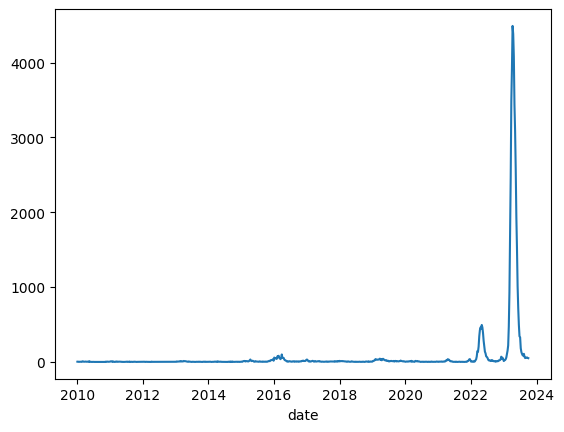

In [22]:
dengue[(dengue.geocode==4205407)&dengue.train_2].set_index('date').casos.plot();

In [66]:
clima = pd.read_csv('/home/fccoelho/Downloads/climate.csv.gz')

In [67]:
clima

,epiweek,geocode,temp_min,temp_med,temp_max,precip_min,precip_med,precip_max,precip_tot,pressure_min,pressure_med,pressure_max,rel_humid_min,rel_humid_med,rel_humid_max,thermal_range,rainy_days
0,200952,1100015,22.6541,25.3319,29.7276,0.0000,0.1720,0.9230,1.3760,0.9927,0.9956,0.9976,69.7894,86.6458,97.2552,7.0735,2
1,200952,1100023,23.2568,25.9436,30.4228,0.0000,0.0965,0.3546,0.7718,0.9920,0.9956,0.9979,65.5052,86.0525,96.8666,7.1660,2
2,200952,1100031,22.9422,25.6548,29.2932,0.0036,0.3076,1.0154,2.4612,0.9918,0.9949,0.9965,65.5042,85.2416,94.9252,6.3511,2
3,200952,1100049,22.9514,25.4011,29.0221,0.0002,0.2372,1.5881,1.8981,0.9926,0.9957,0.9976,77.1913,89.0690,97.2156,6.0708,2
4,200952,1100056,23.0147,25.6633,29.1107,0.0022,0.4213,2.5724,3.3698,0.9918,0.9949,0.9966,67.1514,85.2178,93.8739,6.0960,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266615,202424,5222005,15.7780,21.2075,28.0241,0.0000,0.0000,0.0000,0.0000,1.0035,1.0063,1.0086,33.8900,60.4234,82.1108,12.2461,0
4266616,202424,5222054,19.2411,24.6103,31.3890,0.0000,0.0000,0.0000,0.0000,1.0021,1.0047,1.0070,31.3796,52.9297,70.0258,12.1479,0
4266617,202424,5222203,16.4758,22.4709,28.7449,0.0000,0.0000,0.0000,0.0000,1.0031,1.0056,1.0083,42.3314,62.3317,82.3316,12.2691,0
4266618,202424,5222302,17.0510,23.0165,29.5646,0.0000,0.0000,0.0000,0.0000,1.0022,1.0049,1.0073,34.5235,58.6456,81.2705,12.5136,0


In [68]:
clima['date'] = clima['epiweek'].apply(get_start_date)
clima

,epiweek,geocode,temp_min,temp_med,temp_max,precip_min,precip_med,precip_max,precip_tot,pressure_min,pressure_med,pressure_max,rel_humid_min,rel_humid_med,rel_humid_max,thermal_range,rainy_days,date
0,200952,1100015,22.6541,25.3319,29.7276,0.0000,0.1720,0.9230,1.3760,0.9927,0.9956,0.9976,69.7894,86.6458,97.2552,7.0735,2,2009-12-27
1,200952,1100023,23.2568,25.9436,30.4228,0.0000,0.0965,0.3546,0.7718,0.9920,0.9956,0.9979,65.5052,86.0525,96.8666,7.1660,2,2009-12-27
2,200952,1100031,22.9422,25.6548,29.2932,0.0036,0.3076,1.0154,2.4612,0.9918,0.9949,0.9965,65.5042,85.2416,94.9252,6.3511,2,2009-12-27
3,200952,1100049,22.9514,25.4011,29.0221,0.0002,0.2372,1.5881,1.8981,0.9926,0.9957,0.9976,77.1913,89.0690,97.2156,6.0708,2,2009-12-27
4,200952,1100056,23.0147,25.6633,29.1107,0.0022,0.4213,2.5724,3.3698,0.9918,0.9949,0.9966,67.1514,85.2178,93.8739,6.0960,2,2009-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266615,202424,5222005,15.7780,21.2075,28.0241,0.0000,0.0000,0.0000,0.0000,1.0035,1.0063,1.0086,33.8900,60.4234,82.1108,12.2461,0,2024-06-09
4266616,202424,5222054,19.2411,24.6103,31.3890,0.0000,0.0000,0.0000,0.0000,1.0021,1.0047,1.0070,31.3796,52.9297,70.0258,12.1479,0,2024-06-09
4266617,202424,5222203,16.4758,22.4709,28.7449,0.0000,0.0000,0.0000,0.0000,1.0031,1.0056,1.0083,42.3314,62.3317,82.3316,12.2691,0,2024-06-09
4266618,202424,5222302,17.0510,23.0165,29.5646,0.0000,0.0000,0.0000,0.0000,1.0022,1.0049,1.0073,34.5235,58.6456,81.2705,12.5136,0,2024-06-09


In [69]:
clima.columns

Index(['epiweek', 'geocode', 'temp_min', 'temp_med', 'temp_max', 'precip_min',
       'precip_med', 'precip_max', 'precip_tot', 'pressure_min',
       'pressure_med', 'pressure_max', 'rel_humid_min', 'rel_humid_med',
       'rel_humid_max', 'thermal_range', 'rainy_days', 'date'],
      dtype='object')

In [71]:
clima[[ 'date','epiweek', 'geocode', 'temp_min', 'temp_med', 'temp_max', 'precip_min',
       'precip_med', 'precip_max', 'precip_tot', 'pressure_min',
       'pressure_med', 'pressure_max', 'rel_humid_min', 'rel_humid_med',
       'rel_humid_max', 'thermal_range', 'rainy_days']].to_csv('climate.csv.gz', index=False)